In [ ]:
from keras import backend as K
K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()



In [2]:
from PIL import Image
import pandas as pd
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Flatten
    

In [3]:
TRAIN_DIR = './imgs/train'

datagen = ImageDataGenerator(rotation_range=30,
        zoom_range=0.3,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        validation_split=0.2, rescale=1./255)


train_generator = datagen.flow_from_directory(
    TRAIN_DIR,  (224, 224),
    subset='training'
    
)

val_generator = datagen.flow_from_directory(
    TRAIN_DIR, (224, 224),
    subset='validation'
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [5]:
vgg_model = VGG16(weights='imagenet', include_top=False,
    input_shape=(224, 224, 3),
    pooling="avg")

out1 = Dropout(0.5)(vgg_model.output)
out1 = Dense(512, activation="relu")(out1)

out2 = Dense(10, activation="softmax")(out1)

vggmodel3 = Model(inputs=vgg_model.input, outputs=out2)
ad= SGD(lr=0.002)

vggmodel3.compile(loss='categorical_crossentropy', optimizer=ad, metrics=['accuracy'])

print(vggmodel3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [6]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0' # 使用 GPU 0
hist = vggmodel3.fit_generator(generator=train_generator, epochs=7, validation_data=val_generator, verbose=1)

Epoch 1/7
561/561 [==============================] - 265s 472ms/step - loss: 2.3018 - acc: 0.1192 - val_loss: 2.2638 - val_acc: 0.1245
Epoch 2/7
561/561 [==============================] - 255s 454ms/step - loss: 2.1949 - acc: 0.1877 - val_loss: 1.9850 - val_acc: 0.3720
Epoch 3/7
561/561 [==============================] - 258s 460ms/step - loss: 1.7566 - acc: 0.3799 - val_loss: 1.7117 - val_acc: 0.3943
Epoch 4/7
561/561 [==============================] - 254s 453ms/step - loss: 1.2342 - acc: 0.5752 - val_loss: 0.8176 - val_acc: 0.7425
Epoch 5/7
561/561 [==============================] - 254s 452ms/step - loss: 0.8583 - acc: 0.7068 - val_loss: 0.7362 - val_acc: 0.7697
Epoch 6/7
561/561 [==============================] - 253s 451ms/step - loss: 0.6563 - acc: 0.7776 - val_loss: 0.4762 - val_acc: 0.8436
Epoch 7/7
561/561 [==============================] - 257s 458ms/step - loss: 0.5283 - acc: 0.8253 - val_loss: 0.4475 - val_acc: 0.8777


In [ ]:
#hist = vggmodel3.fit_generator(generator=train_generator, epochs=2, validation_data=val_generator, verbose=1)

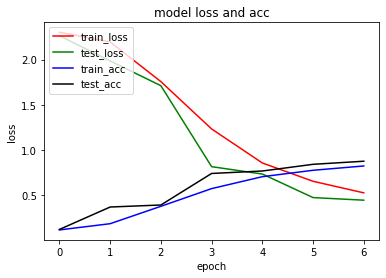

In [23]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='g')
plt.plot(hist.history['acc'],color='b')
plt.plot(hist.history['val_acc'],color='k')
plt.title('model loss and acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left')
plt.show()

In [31]:

from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

import numpy as np


img_path = './imgs/test/img_42.jpg'
img = image.load_img(img_path,target_size=(224, 224))
res = image.img_to_array(img)
res = np.expand_dims(res, axis=0)
res = preprocess_input(res)
preds = vggmodel3.predict(res)
print(preds)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
